In [1]:
import sys
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Input
from keras.models import Model
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
tf.keras.losses.CategoricalCrossentropy(from_logits=False)


In [2]:
#loading our dataset
def dataset_load():
  (train, train_label), (test, test_label) = cifar10.load_data()#load cifr data and store in train and test variable
  print('Train shape: X=%s, y=%s' % (train.shape, train_label.shape))#printing train data shape
  print('Test shape: X=%s, y=%s' % (test.shape, test_label.shape))#printing test data shape
  # one hot encode target values
  train_label = to_categorical(train_label)
  test_label = to_categorical(test_label)
  train_norm = train.astype('float32')#convert image data type into float 32
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0# normalise train dataset
  test_norm = test_norm / 255.0# normalise test dataset
  return train_norm,train_label,test,test_label# retuen all the train and test data


In [3]:
train,train_label,test,test_label=dataset_load()

Train shape: X=(50000, 32, 32, 3), y=(50000, 1)
Test shape: X=(10000, 32, 32, 3), y=(10000, 1)


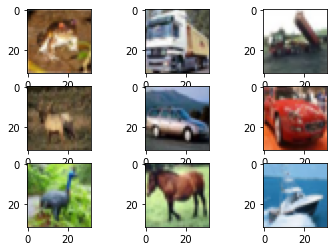

In [4]:
# summarize loaded dataset

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train[i])
# show the figure
pyplot.show()

In [5]:
def NetA():
  input_rgb = Input(shape=(32,32,3))#input shape of image
  flaten= Flatten()(input_rgb)# flatten the layer
  output=Dense(10,activation='linear')(flaten)#output layer and we add activation is linear because our model should be fully connected  linear
  model = Model(inputs = input_rgb, outputs = output)
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True), optimizer='adam',metrics=['accuracy'])#compile our model 
  return model

In [6]:
 def NetB():
  input_rgb = Input(shape=(32,32,3))#input layer of model
  flaten= Flatten()(input_rgb)#flatten layer
  flaten=Dense(300,activation='relu')(flaten)# dense hidden layer
  output=Dense(10,activation='linear')(flaten)#output layer
  model = Model(inputs = input_rgb, outputs = output)
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True), optimizer='adam',metrics=['accuracy'])#compiling model
  return model

In [7]:
def NetC():
  input_rgb = Input(shape=(32,32,3))#input layer
  convolution = Conv2D(25, (5, 5), name='conv1', padding="same",activation='relu')(input_rgb)#convolution layer
  convolution = MaxPooling2D(pool_size=(2,2))(convolution)#maxpooling layer
  flaten= Flatten()(convolution)#flatten layer
  output=Dense(10,activation='linear')(flaten)#output layer
  model = Model(inputs = input_rgb, outputs = output)
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits = True), optimizer='adam',metrics=['accuracy'])#compiling our model
  return model

In [8]:
# plot functtion

def plot_history(history):
  for i in range(len(history)):
    pyplot.figure(figsize=(10,5))#setting figure size
    pyplot.subplot(211)#subplot axis value
    print('training  accuracy of Model '+history[i]['name']+'    '+str(history[i]['train_accuracy']))#printing training accuracy
    print('testing accuracy of Model '+history[i]['name']+'    '+str(history[i]['test_accuracy']))#printing test accuracy
    pyplot.title(history[i]['name']+' Cross Entropy Loss')#setting plot title
    pyplot.plot(history[i]['loss'], color='blue', label='train')#plottting train loss 
    pyplot.plot(history[i]['val_loss'], color='orange', label='test')#plotting test loss
    pyplot.xlabel('epochs')#set x axis label
    pyplot.ylabel('loss')#set y axis label
    pyplot.legend(["train", "test"])#setting legend
    pyplot.show()

    pyplot.figure(figsize=(10,5))#setting figure size
    pyplot.subplot(212)
    pyplot.title(history[i]['name']+' Classification Accuracy')#setting plot title
    pyplot.plot(history[i]['accuracy'], color='blue', label='train')#plotting train accuracy
    pyplot.plot(history[i]['val_accuracy'], color='orange', label='test')#plotting test accuracy
    pyplot.xlabel('epochs')#set x axis label
    pyplot.ylabel('accuracy')#set y axis label
    pyplot.legend(["train", "test"])#setting legend
    pyplot.show()

training  accuracy of Model NetA    0.4275600016117096
testing accuracy of Model NetA    0.29159998893737793


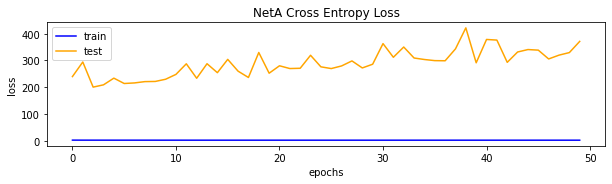

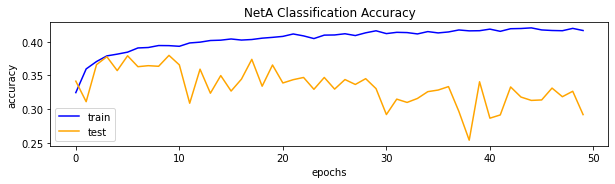

training  accuracy of Model NetB    0.5415800213813782
testing accuracy of Model NetB    0.3718000054359436


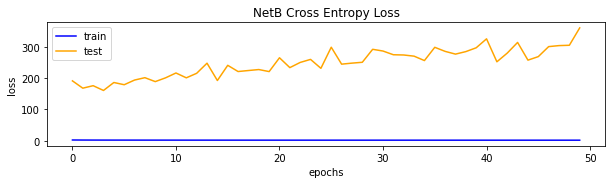

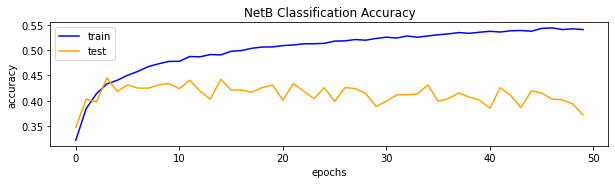

training  accuracy of Model NetC    0.8521199822425842
testing accuracy of Model NetC    0.4706000089645386


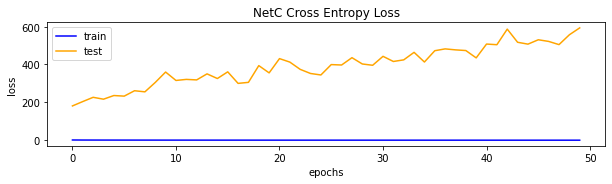

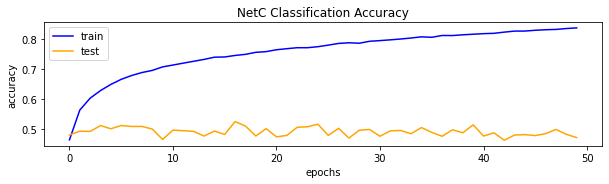

In [9]:
nets = {'NetA':NetA(), 'NetB':NetB(), 'NetC':NetC()}#list of all three model function

train_test_history=[] #list in which we store history loss accuracy of train and test data

for i in nets:  #running for loop to call every model and train the model on dataset and store their performance in list
  model = nets[i]
  history = model.fit(train, train_label, epochs=50, batch_size=64, validation_data=(test, test_label),verbose=0) #model fit and start training
  _,train_acc = model.evaluate(train, train_label, verbose=0) #storing train accuracy of model
  _,test_acc = model.evaluate(test, test_label, verbose=0)  #storing test accuracy of model
  train_test_history.append({'name':i,'loss':history.history['loss'],'val_loss':history.history['val_loss'],'accuracy':history.history['accuracy'],'val_accuracy':history.history['val_accuracy'],'train_accuracy':train_acc,'test_accuracy':test_acc})

plot_history(train_test_history)

# Accuracy Table

In [10]:
#accuracy of models
from prettytable import PrettyTable

x = PrettyTable(['Model_name', 'train_accuracy','test_accuracy'])
x.add_row(['NetA', 0.43,0.28])
x.add_row(['NetB', 0.56,0.41])
x.add_row(['NetC', 0.85,0.45])

print(x)

+------------+----------------+---------------+
| Model_name | train_accuracy | test_accuracy |
+------------+----------------+---------------+
|    NetA    |      0.43      |      0.28     |
|    NetB    |      0.56      |      0.41     |
|    NetC    |      0.85      |      0.45     |
+------------+----------------+---------------+


# **Observation**
We observe that <br>
**first model :**In first model our model is linear and we get train accuracy 43% and test accuracy is 28%

**Second model:** In second model we get 56% accuracy on train data and 41% accuracy on test data.If we train second model for large epochs we get good accuracy 

**Third model:** In this model we get higher and very good train accuracy then last model but test accuracy is low.we get 85% accuracy on train data and 45% accuracy on test data. we can say it is ovrfit model accordinf to their accuracy because higher accuracy on train data and lower accuracy on test data.

I also tried to add activation function as softmax function in last layer for NetB ,NetC model but i got same accuracy as same as got accuracy by linear activation function